In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller,acf,pacf
#acf=autocorrelation function (q=MA)
#pacf=partial autocorrelation function (P=AR)

In [2]:
from statsmodels.tsa.arima_model import ARIMA,ARMA
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/akjadon/TimeSeries/master/Exercise/AirPassengers.csv',index_col='Month',parse_dates = ['Month'])

In [5]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


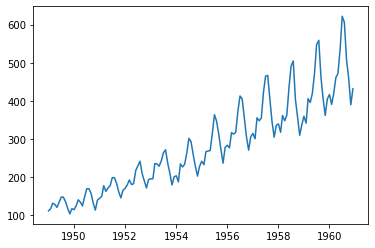

In [6]:
ts=df['#Passengers']
plt.plot(ts)

In [7]:
def test_stationarity(timeseries):
    rollmean=timeseries.rolling(window=12,center=False).mean()
    rollstd=timeseries.rolling(window=12,center=False).std()
    #plot rolling statistics
    orig=plt.plot(timeseries,label='original',color='red')
    mean=plt.plot(rollmean,label='mean',color='black')
    std=plt.plot(rollstd,label='std',color='blue')
    plt.title('Rolling')
    plt.show()
    
    #dickey fuller test
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

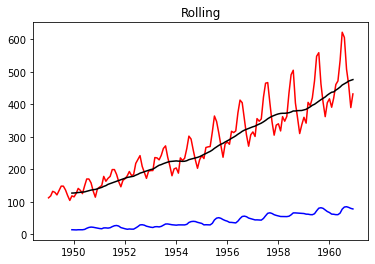

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [8]:
test_stationarity(ts)

### decomposition (transformation)

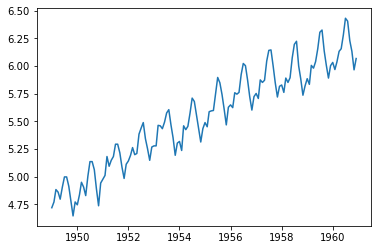

In [9]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [10]:
moving_average = ts_log.rolling(window=12).mean()
moving_std = ts_log.rolling(window=12).std()

In [11]:
ts_log_diff = ts_log-moving_average

In [12]:
ts_log_diff.dropna(inplace=True)

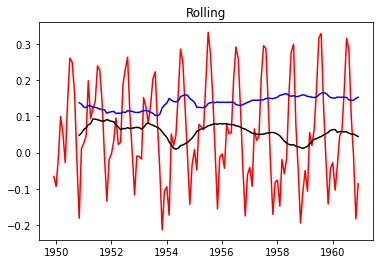

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [13]:
test_stationarity(ts_log_diff)

### ACF

Text(0.5, 1.0, 'Autocorrelation')

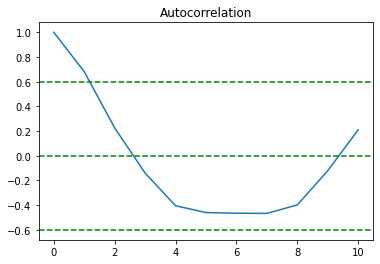

In [14]:
plt.plot(range(0,11),acf(ts_log_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=0.6,linestyle='--',color='green')
plt.axhline(y=-0.6,linestyle='--',color='green')
plt.title('Autocorrelation')

#### PACF

Text(0.5, 1.0, 'PartialAutocorrelation')

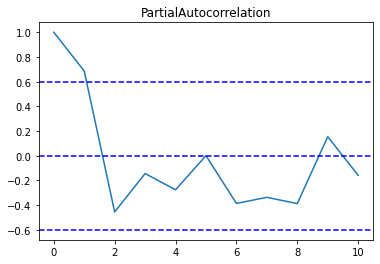

In [15]:
plt.plot(range(0,11),pacf(ts_log_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='blue')
plt.axhline(y=0.6,linestyle='--',color='blue')
plt.axhline(y=-0.6,linestyle='--',color='blue')
plt.title('PartialAutocorrelation')


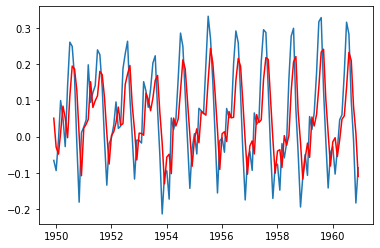

In [16]:
model = ARMA(ts_log_diff,order=(1,0)).fit()

plt.plot(ts_log_diff)
plt.plot(model.fittedvalues,color='r')

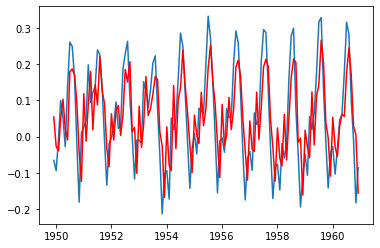

In [17]:
model = ARIMA(ts_log_diff,order=(1,0,1)).fit()

plt.plot(ts_log_diff)
plt.plot(model.fittedvalues,color='r')

